[{'name': 'Mockingbird', 'popularity': 90, 'duration_min': 4.179333333333333}, {'name': 'Without Me', 'popularity': 90, 'duration_min': 4.838666666666667}, {'name': 'The Real Slim Shady', 'popularity': 88, 'duration_min': 4.736666666666666}, {'name': 'Lose Yourself', 'popularity': 79, 'duration_min': 5.4411}, {'name': 'Superman', 'popularity': 88, 'duration_min': 5.838666666666667}, {'name': 'Till I Collapse', 'popularity': 86, 'duration_min': 4.9631}, {'name': 'Love The Way You Lie', 'popularity': 85, 'duration_min': 4.38955}, {'name': 'Godzilla (feat. Juice WRLD)', 'popularity': 84, 'duration_min': 3.513333333333333}, {'name': 'Stan', 'popularity': 84, 'duration_min': 6.7351}, {'name': 'Not Afraid', 'popularity': 82, 'duration_min': 4.13555}]
                  name  popularity  duration_min
0          Mockingbird          90      4.179333
1           Without Me          90      4.838667
2  The Real Slim Shady          88      4.736667


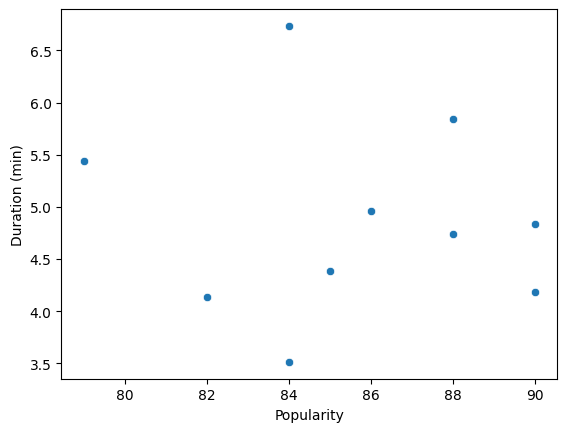

In [1]:
import matplotlib.pyplot as plt



from dotenv import load_dotenv
#lee env

import os 
#interactua con sistema opertativo 


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns

# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Obtener las credenciales del cliente de Spotify del archivo .env
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Crear una instancia de Spotify con autenticación

auth_manager = SpotifyClientCredentials( client_id = client_id, client_secret = client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)




#Definir el ID del artista para obtener las mejores canciones


eminem_id= "7dGJo4pcD2V6oG8kP0tJRR"

# Obtener las mejores canciones del artista
response = sp.artist_top_tracks(eminem_id)


if response:
    #Extraer los datos relevantes de cada canción
    tracks = []
    for track in response["tracks"][:10]:
        track_data = {
            "name": track["name"],
            "popularity": track["popularity"],
            "duration_min": track["duration_ms"] / (1000 * 60)
        }
        tracks.append(track_data)

# Imprimir los datos extraídos para verificar si la clave "popularity" está presente
print(tracks)

# Crear un DataFrame de pandas con los datos de las canciones
tracks_df = pd.DataFrame(tracks)

# Ordenar el DataFrame por popularidad en orden descendente
tracks_df.sort_values(["popularity"], ascending=False, inplace=True)

#Imprimir las primeras tres filas del DataFrame
print(tracks_df.head(3))

   # Crear un gráfico de dispersión utilizando seaborn
import seaborn as sns
scatter_plot = sns.scatterplot(data=tracks_df, x="popularity", y="duration_min")
scatter_plot.set(xlabel="Popularity", ylabel="Duration (min)")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")